# Teste de exibição de taxa de acerto por frequência

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

              precision    recall  f1-score   support

      Normal       0.92      0.98      0.95        62
        HI-1       0.71      0.80      0.75        80
        HI-2       0.98      0.78      0.87        81
        HI-3       0.86      0.92      0.89        59
        LI-1       0.70      0.62      0.66        79
        LI-2       0.90      1.00      0.95        72
        LI-3       1.00      1.00      1.00        86

    accuracy                           0.87       519
   macro avg       0.87      0.87      0.87       519
weighted avg       0.87      0.87      0.86       519



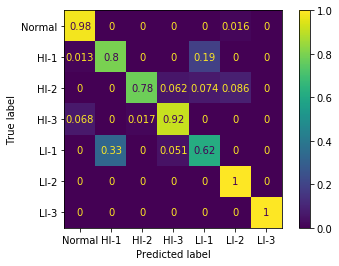

In [2]:
TARGET_LABELS = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

fs20_df = pd.read_csv('./csvs/fs20.csv')
target_s = fs20_df.pop('target')

X = fs20_df.values
y = target_s.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = make_pipeline(
    StandardScaler(),
    SVC(cache_size=500)
    ).fit(
        X_train,
        y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=TARGET_LABELS))

plot_confusion_matrix(
    estimator=classifier,
    X=X_test,
    y_true=y_test,
    normalize='true',
    display_labels=TARGET_LABELS
)

A ultima coluna dos dados de treino e teste são relacionados à frequência

In [3]:
# Retorna a ultima coluna da matriz
freq_test = X_test[:,-1]

freq_df = pd.DataFrame(
    data=[freq_test, y_test, y_pred],
    index=['freq', 'true_target', 'pred_target']
    ).transpose()

freq_df['score'] = np.where(freq_df['true_target'] == freq_df['pred_target'], 1, 0)

freq_df

,freq,true_target,pred_target,score
0,45.0,0.0,0.0,1
1,50.0,5.0,5.0,1
2,55.0,2.0,2.0,1
3,35.0,5.0,5.0,1
4,60.0,4.0,4.0,1
...,...,...,...,...
514,60.0,1.0,1.0,1
515,55.0,6.0,6.0,1
516,35.0,6.0,6.0,1
517,40.0,0.0,0.0,1


[Text(0, 0.5, 'contagem'),
 [Text(0, 0, 'Normal'),
  Text(0, 0, 'HI-1'),
  Text(0, 0, 'HI-2'),
  Text(0, 0, 'HI-3'),
  Text(0, 0, 'LI-1'),
  Text(0, 0, 'LI-2'),
  Text(0, 0, 'LI-3')],
 Text(0.5, 0, 'classes')]

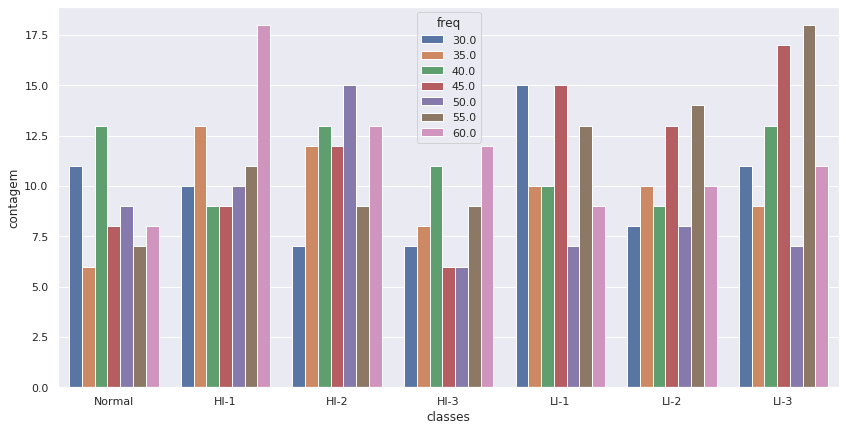

In [4]:
sns.set(style='darkgrid', rc={'figure.figsize':(14, 7)})

sns.countplot(
    data=freq_df,
    x='true_target',
    hue='freq'
    ).set(
        xticklabels=TARGET_LABELS,
        xlabel='classes',
        ylabel='contagem')

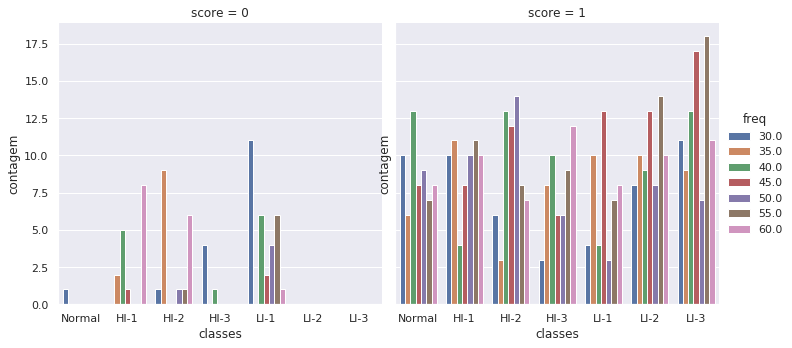

In [5]:
sns.catplot(
    data=freq_df,
    kind='count',
    x='true_target',
    hue='freq',
    col='score'
    ).set(
        xticklabels=TARGET_LABELS,
        xlabel='classes',
        ylabel='contagem')

## Buscando porcentagem de acerto por frequência

In [6]:
score_dict = {}

for freq, df in freq_df.groupby('freq'):
    score_dict[f'freq_{freq}_support'] = len(df)
    score_dict[f'freq_{freq}_acc'] = accuracy_score(y_true=df['true_target'].values,
                                                    y_pred=df['pred_target'].values)

score_df = pd.DataFrame(score_dict, index=[0])
score_df

,freq_30.0_support,freq_30.0_acc,freq_35.0_support,freq_35.0_acc,freq_40.0_support,freq_40.0_acc,freq_45.0_support,freq_45.0_acc,freq_50.0_support,freq_50.0_acc,freq_55.0_support,freq_55.0_acc,freq_60.0_support,freq_60.0_acc
0,69,0.753623,68,0.838235,78,0.846154,80,0.9625,62,0.919355,81,0.91358,81,0.814815
